In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [57]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [58]:
df = pd.read_csv("../../Own_model/data_csv/Student_Performance.csv").drop(
    columns='Extracurricular Activities'
)

In [59]:
df

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,9,1,91.0
1,4,82,4,2,65.0
2,8,51,7,2,45.0
3,5,52,5,2,36.0
4,7,75,8,5,66.0
...,...,...,...,...,...
9995,1,49,4,2,23.0
9996,7,64,8,5,58.0
9997,6,83,8,5,74.0
9998,9,97,7,0,95.0


In [60]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [61]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.2,
                                                    random_state=40)

In [62]:
scaler = StandardScaler()
x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.transform(x_test)

In [135]:
model = Sequential()

model.add(Dense(4, activation='relu', input_dim=4))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='linear'))

C:\Users\Parth\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [136]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ dense_33 (Dense)              │ (None, 4)             │           20 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_34 (Dense)              │ (None, 4)             │           20 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_35 (Dense)              │ (None, 1)             │            5 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 45 (180.00 B)

 Trainable params: 45 (180.00 B)

 Non-trainable params: 0 (0.00 B)

In [137]:
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mse'])

In [138]:
# batch_size = x_train.shape[0]      = Batch_Gradient_Descent
# batch_size = 1                     = Stochastic_Gradient_Descent
# batch_size = x_train.shape[0] / 10 = Mini-batch Gradient Descent
history = model.fit(x_train_s, y_train, epochs=200, validation_split=0.2, batch_size=800)

Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 55.7291 - mse: 3486.6941 - val_loss: 53.6111 - val_mse: 3239.5476
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 55.2636 - mse: 3428.0447 - val_loss: 53.5718 - val_mse: 3235.1506
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 55.6348 - mse: 3475.8965 - val_loss: 53.5307 - val_mse: 3230.5142
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 55.3817 - mse: 3443.2944 - val_loss: 53.4876 - val_mse: 3225.6482
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 55.2686 - mse: 3424.0959 - val_loss: 53.4424 - val_mse: 3220.5371
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 54.9531 - mse: 3392.3037 - val_loss: 53.3949 - val_mse: 3215.1560
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 55.1616 - mse: 3420.6599 - val_loss: 53.3448 - val_mse: 3209.4685
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 54.7651 - mse: 3372.7847 - val_loss: 53.2922 - val_mse: 3203.5012
Epoch 9/

In [139]:
loss, mae = model.evaluate(x_test_s, y_test)
print(f"Testset MAE : {mae:.2f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.5402 - mse: 34.9416  
Testset MAE : 33.19


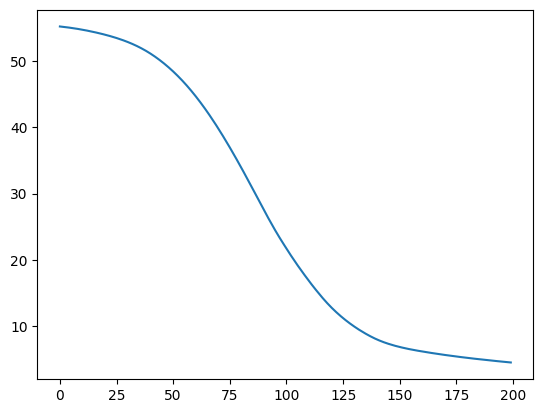

In [140]:
plt.plot(history.history['loss'])

In [141]:
prediction = model.predict(x_test_s)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [142]:
print(mean_squared_error(y_test, prediction))
print(mean_absolute_error(y_test, prediction))
print(r2_score(y_test, prediction))

33.193365629477505
4.427134310722351
0.9072420372772088
